In [10]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import pandas as pd
iris = load_iris()

In [11]:
df = pd.DataFrame(data = iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [12]:
df.shape

(150, 4)

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)

In [15]:
y_predicted = km.fit_predict(df)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [16]:
df['cluster'] = y_predicted
df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


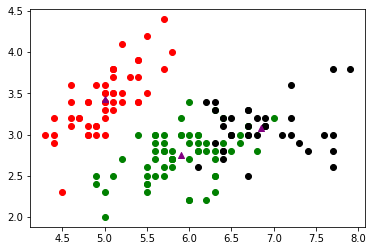

In [17]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.sepal_length,df1.sepal_width,color='green')
plt.scatter(df2.sepal_length,df2.sepal_width,color='red')
plt.scatter(df3.sepal_length,df3.sepal_width,color='black')
plt.scatter(km.cluster_centers_[:,[0]],km.cluster_centers_[:,[1]],color = 'purple',marker='^')

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled.sepal_length = scaler.fit_transform(df[['sepal_length']])
df_scaled.sepal_width = scaler.fit_transform(df[['sepal_width']])
df_scaled.petal_length = scaler.fit_transform(df[['petal_leng']])
df_scaled.petal_width = scaler.fit_transform(df[['sepal_width']])

In [19]:
y_predicted = km.fit_predict(df_scaled)

df_scaled.cluster = y_predicted
df_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,0.222222,0.625000,1.4,0.2,1
1,0.166667,0.416667,1.4,0.2,1
2,0.111111,0.500000,1.3,0.2,1
3,0.083333,0.458333,1.5,0.2,1
4,0.194444,0.666667,1.4,0.2,1


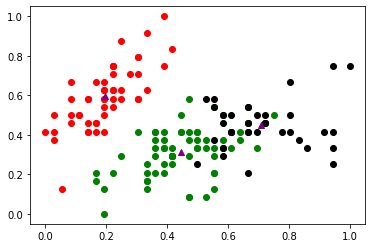

In [20]:
df1 = df_scaled[df_scaled.cluster == 0]
df2 = df_scaled[df_scaled.cluster == 1]
df3 = df_scaled[df_scaled.cluster == 2]
plt.scatter(df1.sepal_length,df1.sepal_width,color='green')
plt.scatter(df2.sepal_length,df2.sepal_width,color='red')
plt.scatter(df3.sepal_length,df3.sepal_width,color='black')
plt.scatter(km.cluster_centers_[:,[0]],km.cluster_centers_[:,[1]],color = 'purple',marker='^')

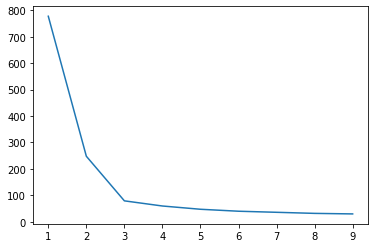

In [21]:
sse = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(df)
    sse.append(km.inertia_)
    
plt.plot(range(1,10),sse)

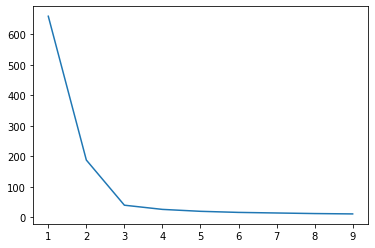

In [23]:
sse = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(df_scaled)
    sse.append(km.inertia_)
    
plt.plot(range(1,10),sse)